<a href="https://colab.research.google.com/github/rohit112121/Parkinson-s-disease-prediction-updated/blob/main/B207_Parkinson's_Disease_Prediction_Using_Voice_Measurements_and_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Upload the **parkinsons.csv** file in this notebook and execute the code.
Link for the csv file is given below
https://drive.google.com/file/d/1qkcff0fJW0kFyMCl74nyAGf3J17aezOR/view?usp=sharing

To upload the** parkinsons.csv** file in this notebook first Download the csv file from the given link and then 
1) Click on **Files** option (Provided to the left side of this text)
2) click on **Upload to Session Storage**
 3) Upload the **parkinsons.csv** file and execute the code by using **Runtime** .

**Importing the Dependencies**

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from collections import Counter

from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import  confusion_matrix, accuracy_score

from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

from sklearn.ensemble import StackingClassifier

**Dataset** **Information**

In [ ]:
# loading the data from csv file to a Pandas DataFrame
parkinsons_data = pd.read_csv('/content/parkinsons.csv')
# printing the first 5 rows of the dataframe
parkinsons_data.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,0.02182,0.03130,0.02971,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,0.03134,0.04518,0.04368,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,0.02757,0.03858,0.03590,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,0.02924,0.04005,0.03772,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,0.03490,0.04825,0.04465,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


Data Observations:
Our Dataset has 24 attributes/columns.
We deal with Object, Int and Float datatype
Status Column is a categorical variable with dtype int.
Our independent variables are measured in different scales Hz, DB, %, Absolute value(MDVP:Jitter(Abs)), Hence we have may have to use a scaling techinque to scale different quantities of measurement.

In [ ]:
# number of rows and columns in the dataframe
parkinsons_data.shape

(195, 24)

In [ ]:
# getting more information about the dataset
parkinsons_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [ ]:
# checking for missing values in each column
parkinsons_data.isnull().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

1    147
0     48
Name: status, dtype: int64
Total Number of patients in our data , who have Parkinson's Disease:75.38461538461539
Total Number of patients in our data , who are healthy:24.615384615384613
There is some class Imbalance in our data , we may have to take measures while building our model to accomodate this


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


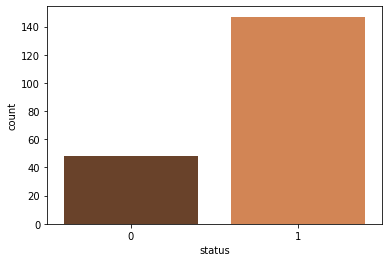

In [ ]:
Class_Balance=parkinsons_data['status'].value_counts()
Class_Balance
Healthy=parkinsons_data[parkinsons_data['status']==0]
PDS=parkinsons_data[parkinsons_data['status']==1]
Healthy=Healthy.shape[0]
PDS=PDS.shape[0]
PD_PERCENT=(PDS/(PDS + Healthy)) * 100
Non_PD=100 - PD_PERCENT
print(Class_Balance)
print("Total Number of patients in our data , who have Parkinson's Disease:{}".format(PD_PERCENT))
print("Total Number of patients in our data , who are healthy:{}".format(Non_PD))
sns.countplot(parkinsons_data['status'],orient="h",saturation=1,palette='copper');

if PD_PERCENT > Non_PD:
    print("There is some class Imbalance in our data , we may have to take measures while building our model to accomodate this")

In [ ]:
# getting some statistical measures about the data
parkinsons_data.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,0.015664,0.017878,0.024081,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,0.010153,0.012024,0.016947,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,0.004550,0.005700,0.007190,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,0.008245,0.009580,0.013080,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,0.012790,0.013470,0.018260,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,0.020265,0.022380,0.029400,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,0.056470,0.079400,0.137780,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [ ]:
# distribution of target Variable
parkinsons_data['status'].value_counts()

1    147
0     48
Name: status, dtype: int64

1 --> Parkinson's Positive

0 --> Healthy person

In [ ]:
# grouping the data bas3ed on the target variable
parkinsons_data.groupby('status').mean()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
status,,,,,,,,,,,,,,,,,,,,,,
0,181.937771,223.636750,145.207292,0.003866,0.000023,0.001925,0.002056,0.005776,0.017615,0.162958,0.009504,0.010509,0.013305,0.028511,0.011483,24.678750,0.442552,0.695716,-6.759264,0.160292,2.154491,0.123017
1,145.180762,188.441463,106.893558,0.006989,0.000051,0.003757,0.003900,0.011273,0.033658,0.321204,0.017676,0.020285,0.027600,0.053027,0.029211,20.974048,0.516816,0.725408,-5.333420,0.248133,2.456058,0.233828


In [ ]:
parkinsons_data_healthy=parkinsons_data.loc[parkinsons_data['status']==0]
parkinsons_data_PD=parkinsons_data.loc[parkinsons_data['status']==1]

Several measures of variation in amplitude


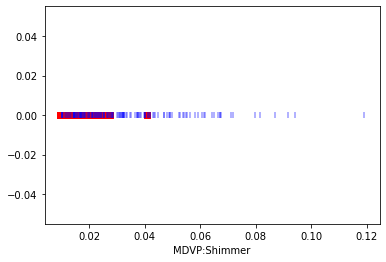

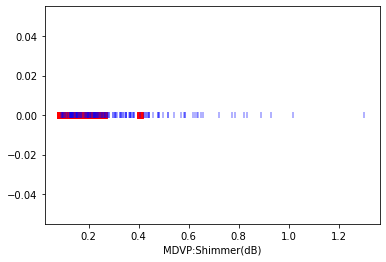

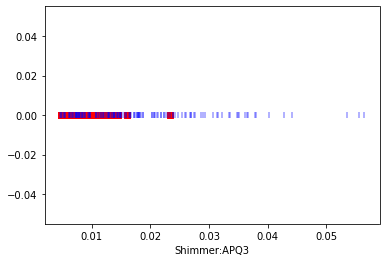

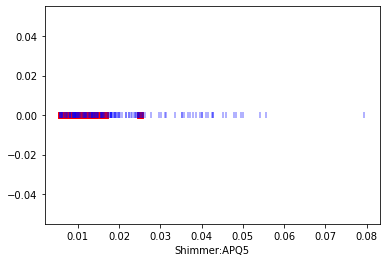

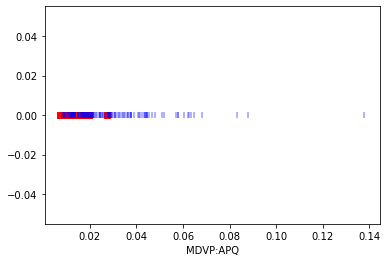

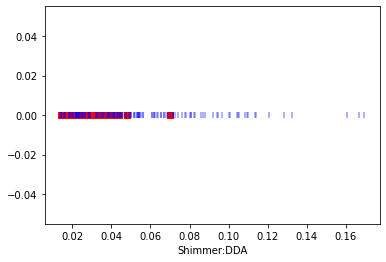

In [ ]:
print("Several measures of variation in amplitude")

plt.scatter(parkinsons_data_healthy['MDVP:Shimmer'],np.zeros_like(parkinsons_data_healthy['MDVP:Shimmer']),marker='s',color='Red')
plt.scatter(parkinsons_data_PD['MDVP:Shimmer'],np.zeros_like(parkinsons_data_PD['MDVP:Shimmer']),marker='|',color='blue',alpha=0.4)
plt.xlabel('MDVP:Shimmer')
plt.show()
plt.scatter(parkinsons_data_healthy['MDVP:Shimmer(dB)'],np.zeros_like(parkinsons_data_healthy['MDVP:Shimmer(dB)']),marker='s',color='Red')
plt.scatter(parkinsons_data_PD['MDVP:Shimmer(dB)'],np.zeros_like(parkinsons_data_PD['MDVP:Shimmer(dB)']),marker='|',color='blue',alpha=0.4)
plt.xlabel('MDVP:Shimmer(dB)')
plt.show()
plt.scatter(parkinsons_data_healthy['Shimmer:APQ3'],np.zeros_like(parkinsons_data_healthy['Shimmer:APQ3']),marker='s',color='Red')
plt.scatter(parkinsons_data_PD['Shimmer:APQ3'],np.zeros_like(parkinsons_data_PD['Shimmer:APQ3']),marker='|',color='blue',alpha=0.4)
plt.xlabel('Shimmer:APQ3')
plt.show()
plt.scatter(parkinsons_data_healthy['Shimmer:APQ5'],np.zeros_like(parkinsons_data_healthy['Shimmer:APQ5']),marker='s',color='Red')
plt.scatter(parkinsons_data_PD['Shimmer:APQ5'],np.zeros_like(parkinsons_data_PD['Shimmer:APQ5']),marker='|',color='blue',alpha=0.4)
plt.xlabel('Shimmer:APQ5')
plt.show()
plt.scatter(parkinsons_data_healthy['MDVP:APQ'],np.zeros_like(parkinsons_data_healthy['MDVP:APQ']),marker='s',color='Red')
plt.scatter(parkinsons_data_PD['MDVP:APQ'],np.zeros_like(parkinsons_data_PD['MDVP:APQ']),marker='|',color='blue',alpha=0.4)
plt.xlabel('MDVP:APQ')
plt.show()

plt.scatter(parkinsons_data_healthy['Shimmer:DDA'],np.zeros_like(parkinsons_data_healthy['Shimmer:DDA']),marker='s',color='Red')
plt.scatter(parkinsons_data_PD['Shimmer:DDA'],np.zeros_like(parkinsons_data_PD['Shimmer:DDA']),marker='|',color='blue',alpha=0.4)
plt.xlabel('Shimmer:DDA')
plt.show()

Measures of variation in amplitude also has overlapping, but PD positive individuals have high value for all parametes which denotes variation in amplitude

In [ ]:
X = parkinsons_data.drop(columns=['name','status'], axis=1)
Y = parkinsons_data['status']
print(X)

     MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  ...   spread2        D2       PPE
0        119.992       157.302        74.997  ...  0.266482  2.301442  0.284654
1        122.400       148.650       113.819  ...  0.335590  2.486855  0.368674
2        116.682       131.111       111.555  ...  0.311173  2.342259  0.332634
3        116.676       137.871       111.366  ...  0.334147  2.405554  0.368975
4        116.014       141.781       110.655  ...  0.234513  2.332180  0.410335
..           ...           ...           ...  ...       ...       ...       ...
190      174.188       230.978        94.261  ...  0.121952  2.657476  0.133050
191      209.516       253.017        89.488  ...  0.129303  2.784312  0.168895
192      174.688       240.005        74.287  ...  0.158453  2.679772  0.131728
193      198.764       396.961        74.904  ...  0.207454  2.138608  0.123306
194      214.289       260.277        77.973  ...  0.190667  2.555477  0.148569

[195 rows x 22 columns]


In [ ]:
print(Y)

0      1
1      1
2      1
3      1
4      1
      ..
190    0
191    0
192    0
193    0
194    0
Name: status, Length: 195, dtype: int64


Splitting the data to training data & Test data

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(195, 22) (156, 22) (39, 22)


In [ ]:
from sklearn.preprocessing import StandardScaler

Data Standardization

In [ ]:
scaler = StandardScaler()

In [ ]:
scaler.fit(X_train)

StandardScaler()

In [ ]:
X_train = scaler.transform(X_train)

X_test = scaler.transform(X_test)

In [ ]:
print(X_train)

[[ 0.63239631 -0.02731081 -0.87985049 ... -0.97586547 -0.55160318
   0.07769494]
 [-1.05512719 -0.83337041 -0.9284778  ...  0.3981808  -0.61014073
   0.39291782]
 [ 0.02996187 -0.29531068 -1.12211107 ... -0.43937044 -0.62849605
  -0.50948408]
 ...
 [-0.9096785  -0.6637302  -0.160638   ...  1.22001022 -0.47404629
  -0.2159482 ]
 [-0.35977689  0.19731822 -0.79063679 ... -0.17896029 -0.47272835
   0.28181221]
 [ 1.01957066  0.19922317 -0.61914972 ... -0.716232    1.23632066
  -0.05829386]]


Support Vector Machine Model Training

In [ ]:
model = svm.SVC(kernel='linear')

In [ ]:
# training the SVM model with training data
model.fit(X_train, Y_train)

SVC(kernel='linear')

Model Evaluation

Accuracy 

In [ ]:
# accuracy score on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(Y_train, X_train_prediction)

In [ ]:
print('Accuracy score of training data : ', training_data_accuracy*100,'%')

Accuracy score of training data :  88.46153846153845 %


In [ ]:
# accuracy score on training data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(Y_test, X_test_prediction)

In [ ]:
print('Accuracy score of test data : ', test_data_accuracy*100,'%')

Accuracy score of test data :  87.17948717948718 %


Extreme Gradient Boosting Classifier

In [ ]:
xgb = XGBClassifier()

parameters = {'min_child_weight' : np.arange(0,20),
              'max_depth': [2, 4, 5, 7, 9, 10]}

grid_search=GridSearchCV(estimator=xgb ,param_grid=parameters,cv=10,n_jobs=-1,verbose=2)
grid_search.fit(X_train,Y_train)

xgb = grid_search.best_estimator_

grid_search.best_params_

Fitting 10 folds for each of 120 candidates, totalling 1200 fits


{'max_depth': 4, 'min_child_weight': 0}

In [ ]:
y_pred=xgb.predict(X_test)

print("\n",confusion_matrix(Y_test,y_pred))
xgb_acc = accuracy_score(Y_test,y_pred)
print("\nAccuracy Score {}".format(xgb_acc*100))




 [[ 7  1]
 [ 6 25]]

Accuracy Score 82.05128205128204


Building a Predictive System

In [ ]:
input_data = (162.56800,198.34600,77.6300,0.00502,0.00003,0.00280,0.00253,0.00841,0.01791,0.16800,0.00793,0.01057,0.01799,0.02380,0.01170,25.67800,0.427785,0.723797,-6.635729,0.0209866,1.957961,0.135242)

# changing input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the numpy array
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardize the data
std_data = scaler.transform(input_data_reshaped)

prediction = model.predict(std_data)
print(prediction)


if (prediction[0] == 0):
  print("The Person does not have Parkinsons Disease")

else:
  print("The Person has Parkinsons")


[0]
The Person does not have Parkinsons Disease


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"
